# Apprentissage : TP2 - Perceptron multi-couche

**FEUILLET Laure, 5SDBD A2**

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('mnist-original') 

In [3]:
from sklearn import model_selection
import numpy as np

echantillon = np.random.randint(70000, size=5000)
data = mnist.data[echantillon]
target = mnist.target[echantillon]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target, train_size=0.7)
print("xtrain.shape = " + str(xtrain.shape))
print("xtest.shape = " + str(xtest.shape))
print("ytrain.shape = " + str(ytrain.shape))
print("ytest.shape = " + str(ytest.shape))

xtrain.shape = (3500, 784)
xtest.shape = (1500, 784)
ytrain.shape = (3500,)
ytest.shape = (1500,)


C:\Users\lkili\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
from sklearn import neural_network
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
def normaliser_resultats(liste_tuples):
    """  param: une liste de tuples, ex : (grandeur, duree_entrainement, duree_prediction, erreur)
         Normalise tout sauf la grandeur. 
         Dans le but de trouver quelle est la valeur de la grandeur qui minimise les autres entrées. 
         return: une liste de tuples 
    """
    liste = list(zip(*liste_tuples))
    res = []
    res.append(liste[0])
    for vecteur in liste[1:]:
        min_liste = min(vecteur)
        max_liste = max(vecteur)
        inter = [(x - min_liste)/(max_liste-min_liste) for x in vecteur]
        res.append(tuple(inter))
    return list(zip(*res))

In [6]:
%%time
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(50))
mlp.fit(xtrain, ytrain)
ypred = mlp.predict(xtest)
score = mlp.score(xtest, ytest)
precision = metrics.precision_score(ytest, ypred, average='micro')
print(f"Score avec .score : {score}")
print(f"Score avec precision_score : {precision}")

Score avec .score : 0.8273333333333334
Score avec precision_score : 0.8273333333333334
Wall time: 3.8 s


In [7]:
indice = 60000
print(f"Classe théorique : {mnist.target[indice]}")
print(f"Classe prédite : {mlp.predict(mnist.data[indice].reshape((1,-1)))[0]}")

Classe théorique : 0.0
Classe prédite : 0.0


## Variation du nombre de couches de 50 neurones

In [8]:
%%time
couches_50neurones = []
print("Variation du nombre de couches de 50 neurones : ")
for nb_couches in [2, 10, 20, 50, 100]:
    mlp = neural_network.MLPClassifier(hidden_layer_sizes=tuple([50 for i in range(nb_couches)]))
    debut_entrainement = time.time()
    mlp.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = mlp.predict(xtest)
    duree_prediction = time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    couches_50neurones.append((nb_couches, duree_entrainement, duree_prediction, erreur))
    print(f"\t {couches_50neurones[-1]}")

Variation du nombre de couches de 50 neurones : 
	 (2, 8.502251386642456, 0.00797891616821289, 0.17733333333333334)
	 (10, 2.3995800018310547, 0.012965202331542969, 0.11066666666666669)
	 (20, 4.3274219036102295, 0.018949508666992188, 0.09399999999999997)
	 (50, 3.037872552871704, 0.034906625747680664, 0.904)
	 (100, 5.688781976699829, 0.08676695823669434, 0.9013333333333333)
Wall time: 24.1 s


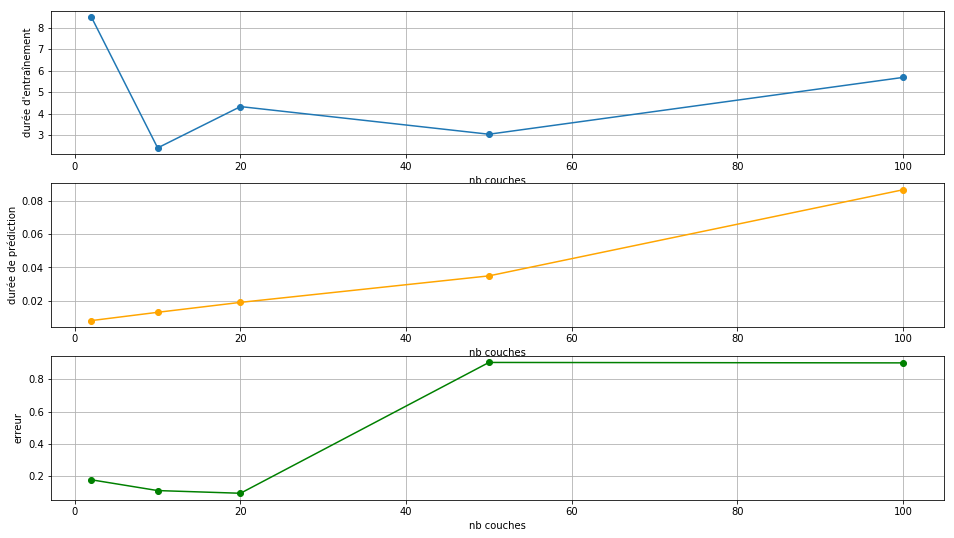

In [9]:
couches_50neurones_liste = list(zip(*couches_50neurones))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(couches_50neurones_liste[0], couches_50neurones_liste[1], 'o-')
plt.xlabel('nb couches')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(couches_50neurones_liste[0], couches_50neurones_liste[2], 'o-', color='orange')
plt.xlabel('nb couches')
plt.ylabel('durée de prédiction')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(couches_50neurones_liste[0], couches_50neurones_liste[3], 'o-', color='green')
plt.xlabel('nb couches')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [10]:
meilleur_nb_couches = min(normaliser_resultats(couches_50neurones), key=lambda item:(item[1]+item[2]+item[3]))[0]
print("Nombre de couches optimal = " + str(meilleur_nb_couches))

Nombre de couches optimal = 10


## 50 couches de 60 à 11 neurones chacune

In [11]:
%%time
mlp = neural_network.MLPClassifier(hidden_layer_sizes=tuple(range(60, 10, -1)))
mlp.fit(xtrain, ytrain)
ypred = mlp.predict(xtest)
erreur = metrics.zero_one_loss(ytest, ypred)
print(f"Erreur d'un MLP de 50 couches : {erreur}")

Erreur d'un MLP de 50 couches : 0.62
Wall time: 5.66 s


## 20 couches de 60 à 11 neurones

In [12]:
%%time
mlp = neural_network.MLPClassifier(hidden_layer_sizes=tuple(list(range(60, 32, -3)) + list(range(31, 12, -2))))
mlp.fit(xtrain, ytrain)
ypred = mlp.predict(xtest)
erreur = metrics.zero_one_loss(ytest, ypred)
print(f"Erreur d'un MLP de 20 couches : {erreur}")

Erreur d'un MLP de 20 couches : 0.10866666666666669
Wall time: 5.26 s


## Variation du `solver`

In [13]:
%%time
solvers = []
print("Variations du solver : ")
for solver in ['lbfgs', 'sgd', 'adam']:
    mlp = neural_network.MLPClassifier(hidden_layer_sizes=(50), solver=solver)
    debut_entrainement = time.time()
    mlp.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = mlp.predict(xtest)
    duree_prediction = time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    solvers.append((solver, duree_entrainement, duree_prediction, erreur))
    print(f"\t {solvers[-1]}")

Variations du solver : 
	 ('lbfgs', 9.884588241577148, 0.009940385818481445, 0.1213333333333333)
	 ('sgd', 7.457057476043701, 0.009964942932128906, 0.7126666666666667)
	 ('adam', 4.410203456878662, 0.00997018814086914, 0.18533333333333335)
Wall time: 21.8 s


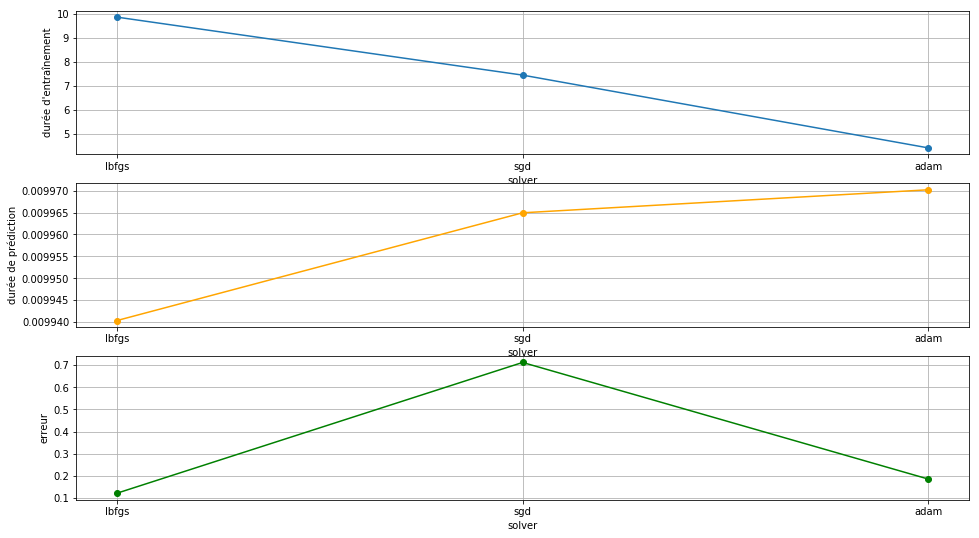

In [14]:
solvers_liste = list(zip(*solvers))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(solvers_liste[0], solvers_liste[1], 'o-')
plt.xlabel('solver')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(solvers_liste[0], solvers_liste[2], 'o-', color='orange')
plt.xlabel('solver')
plt.ylabel('durée de prédiction')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(solvers_liste[0], solvers_liste[3], 'o-', color='green')
plt.xlabel('solver')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [15]:
meilleur_solver = min(normaliser_resultats(solvers), key=lambda item:(item[1]+item[2]+item[3]))[0]
print("Solver optimal = " + str(meilleur_solver))

Solver optimal = lbfgs


## Variation de la fonction d'activation

In [16]:
%%time
activations = []
print("Variations de l'activation : ")
for activation in ['identity', 'logistic', 'tanh', 'relu']:
    mlp = neural_network.MLPClassifier(hidden_layer_sizes=(50), activation=activation)
    debut_entrainement = time.time()
    mlp.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = mlp.predict(xtest)
    duree_prediction = time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    activations.append((activation, duree_entrainement, duree_prediction, erreur))
    print(f"\t {activations[-1]}")

Variations de l'activation : 
	 ('identity', 2.2599546909332275, 0.013962030410766602, 0.14066666666666672)
	 ('logistic', 2.266937494277954, 0.013959407806396484, 0.10933333333333328)
	 ('tanh', 2.553171157836914, 0.006982326507568359, 0.14533333333333331)
	 ('relu', 8.085367679595947, 0.007976770401000977, 0.16933333333333334)
Wall time: 15.2 s


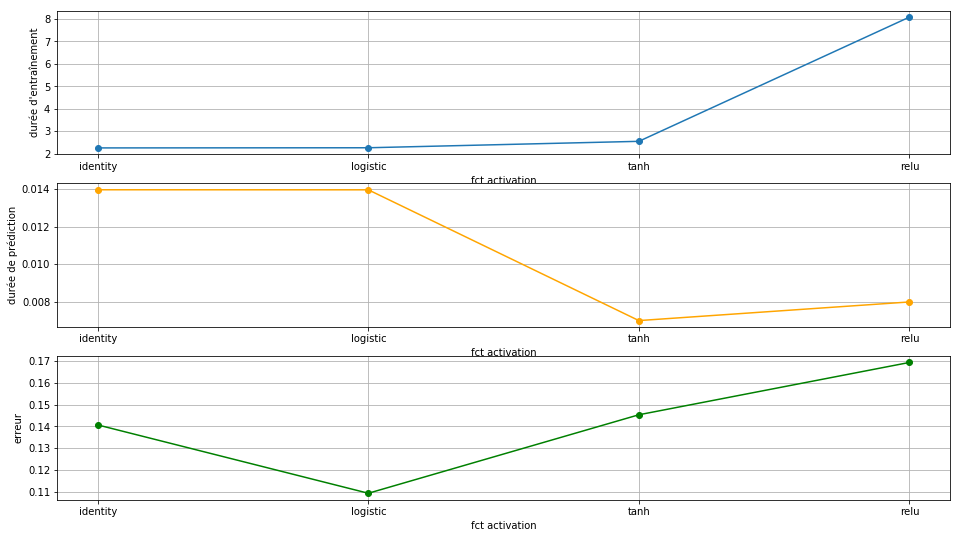

In [17]:
activations_liste = list(zip(*activations))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(activations_liste[0], activations_liste[1], 'o-')
plt.xlabel('fct activation')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(activations_liste[0], activations_liste[2], 'o-', color='orange')
plt.xlabel('fct activation')
plt.ylabel('durée de prédiction')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(activations_liste[0], activations_liste[3], 'o-', color='green')
plt.xlabel('fct activation')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [18]:
meilleure_activation = min(normaliser_resultats(activations), key=lambda item:(item[1]+item[2]+item[3]))[0]
print("Activation optimale = " + str(meilleure_activation))

Activation optimale = tanh


## Variation de la valeur de la régularisation `C`

In [19]:
%%time 
regularisations = []
print("Variations de la régularisation : ")
for regularisation in np.arange(0.0001, 0.01, 0.001):
    mlp = neural_network.MLPClassifier(hidden_layer_sizes=(50), alpha=regularisation)
    debut_entrainement = time.time()
    mlp.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = mlp.predict(xtest)
    duree_prediction = time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    regularisations.append((regularisation, duree_entrainement, duree_prediction, erreur))
    print(f"\t {regularisations[-1]}")

Variations de la régularisation : 
	 (0.0001, 5.7037389278411865, 0.006980419158935547, 0.16933333333333334)
	 (0.0011, 5.0445027351379395, 0.007978200912475586, 0.17466666666666664)
	 (0.0021, 4.27257227897644, 0.007977485656738281, 0.16800000000000004)
	 (0.0031, 3.7030906677246094, 0.011968374252319336, 0.16933333333333334)
	 (0.0041, 5.017578363418579, 0.008976936340332031, 0.18333333333333335)
	 (0.0051, 6.199413537979126, 0.006980419158935547, 0.17066666666666663)
	 (0.0061, 3.6003682613372803, 0.00698089599609375, 0.17133333333333334)
	 (0.0071, 4.446105241775513, 0.006982326507568359, 0.18533333333333335)
	 (0.0081, 6.8756022453308105, 0.008975744247436523, 0.16800000000000004)
	 (0.0091, 2.52524471282959, 0.008975744247436523, 0.1433333333333333)
Wall time: 47.5 s


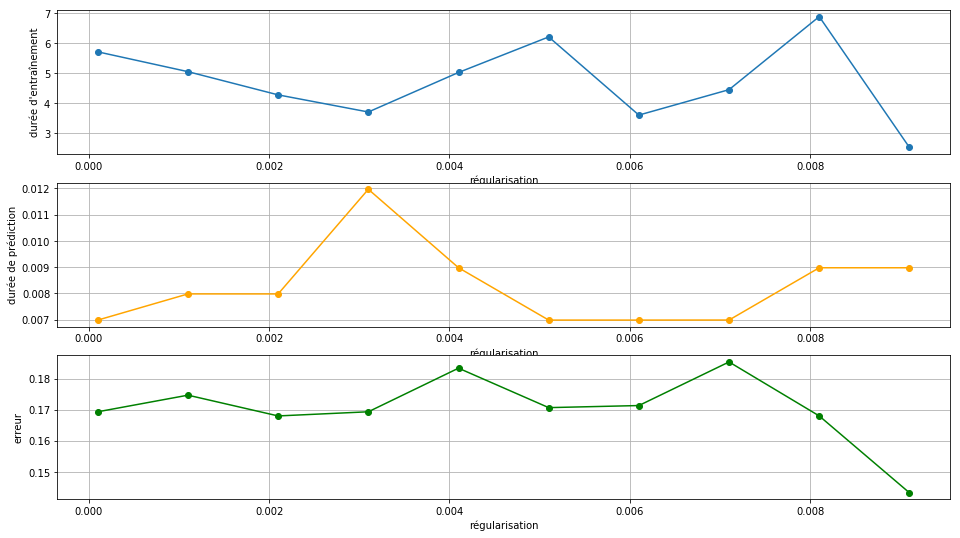

In [20]:
regularisations_liste = list(zip(*regularisations))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(regularisations_liste[0], regularisations_liste[1], 'o-')
plt.xlabel('régularisation')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(regularisations_liste[0], regularisations_liste[2], 'o-', color='orange')
plt.xlabel('régularisation')
plt.ylabel('durée de prédiction')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(regularisations_liste[0], regularisations_liste[3], 'o-', color='green')
plt.xlabel('régularisation')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [21]:
meilleure_regularisation = min(normaliser_resultats(regularisations), key=lambda item:(item[1]+item[2]+item[3]))[0]
print("Régularisation optimale = " + str(meilleure_regularisation))

Régularisation optimale = 0.0091


## Meilleur MLP

In [22]:
print("Les meilleurs hyperparamètres trouvés sont : ")
print(f"\t solver : {meilleur_solver}")
print(f"\t activation : {meilleure_activation}")
print(f"\t regularisation  : {meilleure_regularisation}")

Les meilleurs hyperparamètres trouvés sont : 
	 solver : lbfgs
	 activation : tanh
	 regularisation  : 0.0091


In [23]:
%%time
meilleur_mlp = neural_network.MLPClassifier(hidden_layer_sizes=(10), solver=meilleur_solver, activation=meilleure_activation, alpha=meilleure_regularisation)
debut_entrainement = time.time()
meilleur_mlp.fit(xtrain, ytrain)
meilleure_duree_entrainement = time.time() - debut_entrainement
debut_prediction = time.time()
ypred = meilleur_mlp.predict(xtest)
meilleure_duree_prediction = time.time() - debut_prediction
cv_scores = model_selection.cross_val_score(meilleur_mlp, data, target, cv=10)
meilleure_erreur = 1 - np.mean(cv_scores)

print(f"Durée de l'entraînement : {meilleure_duree_entrainement}")
print(f"Durée de la prédiction : {meilleure_duree_prediction}")
print(f"Erreur : {meilleure_erreur}")

Durée de l'entraînement : 5.8682990074157715
Durée de la prédiction : 0.0069811344146728516
Erreur : 0.31664032891172433
Wall time: 1min 37s


### Erreur par chiffre

Erreur par chiffre : 
	 (0, 0.8787878787878788)
	 (1, 0.07317073170731703)
	 (2, 0.4491017964071856)
	 (3, 0.44805194805194803)
	 (4, 1.0)
	 (5, 1.0)
	 (6, 0.08333333333333337)
	 (7, 0.1283783783783784)
	 (8, 0.28387096774193543)
	 (9, 0.42000000000000004)


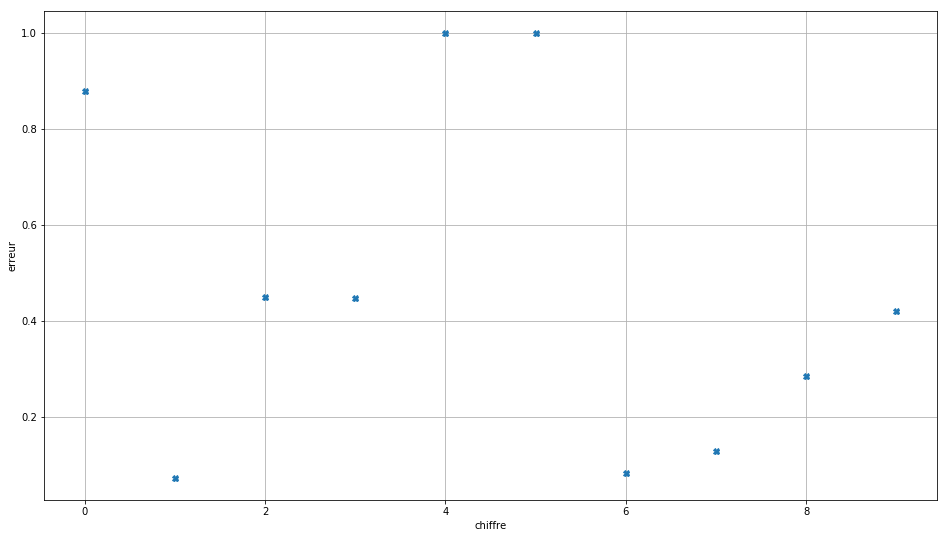

Chiffre le plus précis : 1
Chiffre le moins précis : 4


In [24]:
chiffres = []
print("Erreur par chiffre : ")
for chiffre in range (0, 10):
    erreur = 1 - (ypred[ytest==chiffre] == ytest[ytest==chiffre]).sum() / (ytest==chiffre).sum()
    chiffres.append((chiffre, erreur))
    print(f"\t {chiffres[-1]}")

plt.figure(figsize=(16, 9))
plt.plot(*zip(*chiffres), 'X')
plt.xlabel('chiffre')
plt.ylabel('erreur')
plt.grid(True)
plt.show()

meilleur_chiffre = min(chiffres, key=lambda item:(item[1]))[0]
pire_chiffre = max(chiffres, key=lambda item:(item[1]))[0]
print(f"Chiffre le plus précis : {meilleur_chiffre}")
print(f"Chiffre le moins précis : {pire_chiffre}")

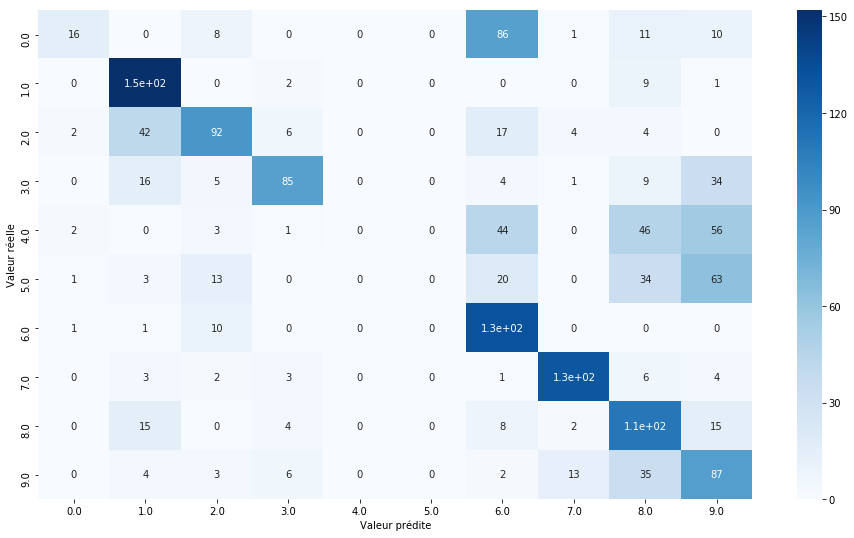

In [25]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm = confusion_matrix(ytest, ypred)
df_cm = pd.DataFrame(cm, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Valeur réelle'
df_cm.columns.name = 'Valeur prédite'
plt.figure(figsize = (16,9))
sn.heatmap(df_cm, cmap="Blues", annot=True)
plt.show()